In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn-v0_8-dark")     

### Simple Mean Average
------

In [2]:
# Get data 

!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

--2024-04-04 11:58:20--  https://lazyprogrammer.me/course_files/sp500_close.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4143332 (4.0M) [text/csv]
Saving to: 'sp500_close.csv'

sp500_close.csv     100%[===================>]   3.95M   333KB/s    in 15s     

2024-04-04 11:58:37 (274 KB/s) - 'sp500_close.csv' saved [4143332/4143332]



In [35]:
df = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)

df.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


In [47]:
# Focus on google 

goog = df[['GOOG']].copy().dropna()

goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


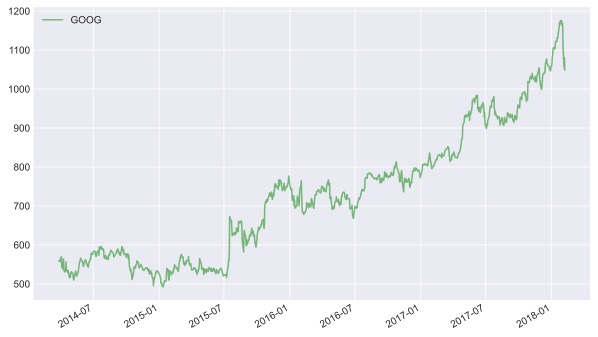

In [48]:
fig, axis = plt.subplots(figsize = (10,6))

goog.plot(color = 'green', alpha = 0.5, ax = axis)

axis.grid()

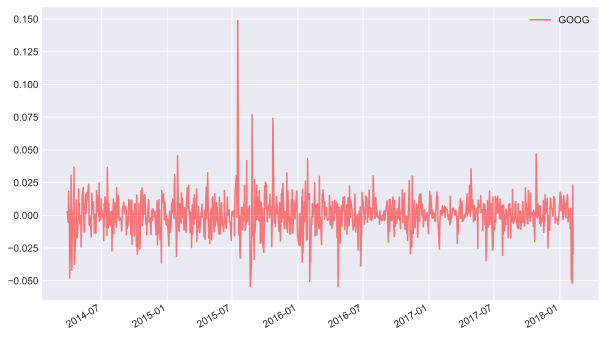

In [49]:
# get daily log return with pct_change and plot

goog_r = np.log(goog.pct_change(1)+1)

fig, axis = plt.subplots(figsize = (10,6))

goog_r.plot(color = 'red', alpha = 0.5, ax = axis)

axis.grid()


In [55]:
# get moving average of a given window size and add it to the goog df and plot

windows = [10,20,40]

for w in windows:

    goog[f"SMA-{w}"] = goog['GOOG'].rolling(w).mean()

goog.head(40)

,GOOG,SMA-10,SMA-20,SMA-40
2014-03-27,558.46,NaN,NaN,NaN
2014-03-28,559.99,NaN,NaN,NaN
2014-03-31,556.97,NaN,NaN,NaN
2014-04-01,567.16,NaN,NaN,NaN
2014-04-02,567.00,NaN,NaN,NaN
2014-04-03,569.74,NaN,NaN,NaN
2014-04-04,543.14,NaN,NaN,NaN
2014-04-07,538.15,NaN,NaN,NaN
2014-04-08,554.90,NaN,NaN,NaN
2014-04-09,564.14,557.965,NaN,NaN


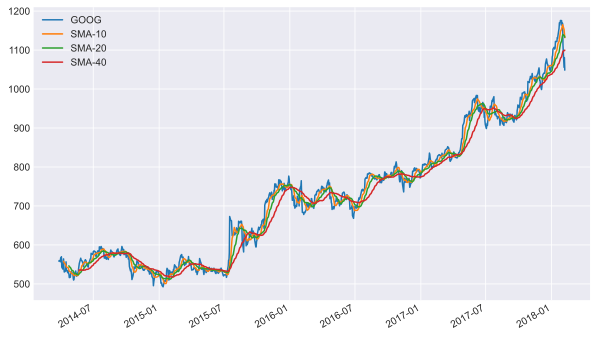

In [56]:
fig, axis = plt.subplots(figsize = (10,6))

goog.plot(ax = axis)

axis.grid()

Enlarging the window size makes the smoother the resulting time series will be for the SMA. Notice also that SMA plots are lagging behind the original GOOG and as the window size gets larger, this lagging will be more pronounced. 

In [66]:
# Lets work with a multi-dimensional times series

goog_aapl = df[['GOOG', 'AAPL']].copy().dropna()

# calculate the covariance
cov = goog_aapl.rolling(50).cov()

# we and 2x2 covariance matrix
cov.head(100)

GOOG       AAPL
2014-03-27 GOOG         NaN        NaN
           AAPL         NaN        NaN
2014-03-28 GOOG         NaN        NaN
           AAPL         NaN        NaN
2014-03-31 GOOG         NaN        NaN
...                     ...        ...
2014-06-04 AAPL         NaN        NaN
2014-06-05 GOOG         NaN        NaN
           AAPL         NaN        NaN
2014-06-06 GOOG  284.718033  -3.042218
           AAPL   -3.042218  35.249873

[100 rows x 2 columns]

In [68]:
# select a single date for the covariance matrix
cov.loc['2014-06-06']

,GOOG,AAPL
GOOG,284.718033,-3.042218
AAPL,-3.042218,35.249873


In [70]:
# get the daily log returns for both google and apple 

goog_aapl_r = np.log(1+goog_aapl.pct_change(1))

goog_aapl_r.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


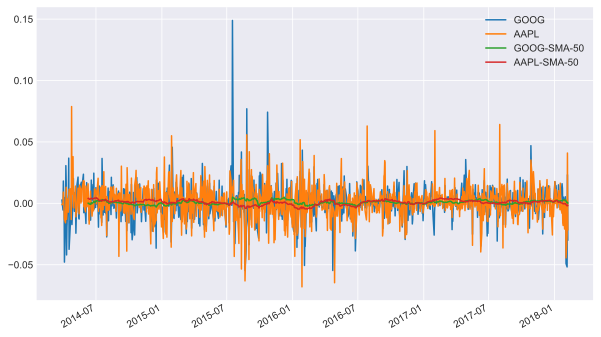

In [71]:
# get moving averages of log returns and plot them with the log returns together 

goog_aapl_r['GOOG-SMA-50'] = goog_aapl_r['GOOG'].rolling(50).mean()
goog_aapl_r['AAPL-SMA-50'] = goog_aapl_r['AAPL'].rolling(50).mean()

fig, axis = plt.subplots(figsize = (10,6))

goog_aapl_r.plot(ax = axis)

axis.grid()

It seems there are some correlations between the returns although there are some exceptions to this (outliers). 

In [75]:
# Next calculate the rolling covariance and correlation of the returns 

cov = goog_aapl_r[['GOOG','AAPL']].rolling(50).cov()

cov.tail(6)

GOOG      AAPL
2018-02-05 GOOG  0.000183  0.000110
           AAPL  0.000110  0.000143
2018-02-06 GOOG  0.000193  0.000129
           AAPL  0.000129  0.000177
2018-02-07 GOOG  0.000212  0.000142
           AAPL  0.000142  0.000185

In [84]:
corr = goog_aapl_r[['GOOG','AAPL']].rolling(50).corr()

corr.tail(8)

GOOG      AAPL
2018-02-02 GOOG  1.000000  0.671209
           AAPL  0.671209  1.000000
2018-02-05 GOOG  1.000000  0.681098
           AAPL  0.681098  1.000000
2018-02-06 GOOG  1.000000  0.700564
           AAPL  0.700564  1.000000
2018-02-07 GOOG  1.000000  0.716376
           AAPL  0.716376  1.000000

### Exponential Weighted Mean Average (EMWA)
------

In [85]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2024-04-04 14:15:13--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: 'airline_passengers.csv'

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2024-04-04 14:15:14 (4.57 MB/s) - 'airline_passengers.csv' saved [2036/2036]



In [88]:
df_al = pd.read_csv('airline_passengers.csv', index_col=0, parse_dates=True)

df_al.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [89]:
# check if there is missing vals

df_al.isna().sum()

Passengers    0
dtype: int64

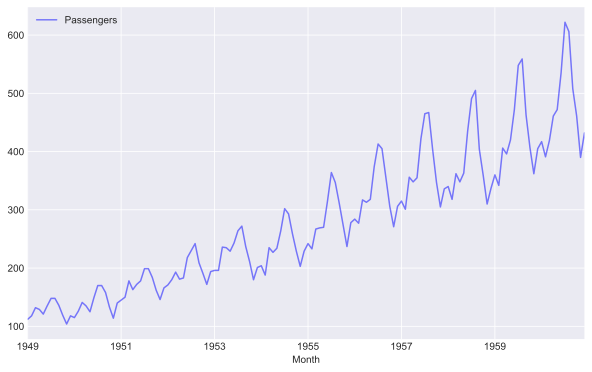

In [90]:
fig, axis = plt.subplots(figsize = (10,6))

df_al.plot(ax = axis, color = "blue", alpha = 0.5)

axis.grid()

In [91]:
alpha = 0.2

df_al['EWMA'] = df_al['Passengers'].ewm(alpha = alpha, adjust=False).mean()

type(df_al['Passengers'].ewm(alpha = alpha, adjust=False))

pandas.core.window.ewm.ExponentialMovingWindow

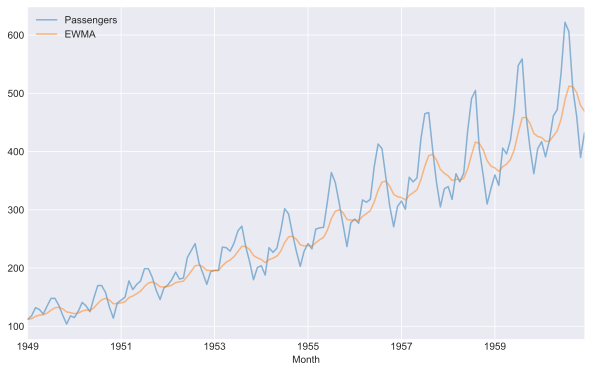

In [92]:
fig, axis = plt.subplots(figsize = (10,6))

df_al.plot(ax = axis, alpha = 0.5)

axis.grid()

In [93]:
df_al.head()

,Passengers,EWMA
Month,,
1949-01-01,112,112.0000
1949-02-01,118,113.2000
1949-03-01,132,116.9600
1949-04-01,129,119.3680
1949-05-01,121,119.6944


In [96]:
man_ewma = list()

for x in df_al['Passengers'].to_numpy():
    if len(man_ewma) > 0:
        xbar = alpha * x + (1-alpha) * man_ewma[-1]
    else:
        xbar = x # bias correction for the first value of the ewma by simply setting it to the first value in the series
    man_ewma.append(xbar)

df_al['man_ewma'] = man_ewma

In [97]:
df_al

,Passengers,EWMA,man_ewma
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,113.200000,113.200000
1949-03-01,132,116.960000,116.960000
1949-04-01,129,119.368000,119.368000
1949-05-01,121,119.694400,119.694400
...,...,...,...
1960-08-01,606,512.214093,512.214093
1960-09-01,508,511.371274,511.371274
1960-10-01,461,501.297019,501.297019


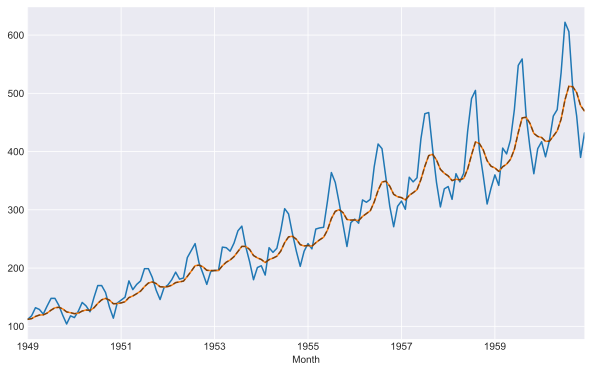

In [106]:
fig, axis = plt.subplots(figsize = (10,6))

columns = df_al.columns.to_list()

for col in columns:

    if col == 'man_ewma':

        df_al[f"{col}"].plot(ax = axis, alpha = 0.5, color = 'black', ls = 'dashed')
    
    else:
        df_al[f"{col}"].plot(ax = axis)

axis.grid()

In [110]:
# drop the reduntant column 

df_al.drop('man_ewma', axis = 1, inplace=True)

In [111]:
df_al.head()

,Passengers,EWMA
Month,,
1949-01-01,112,112.0000
1949-02-01,118,113.2000
1949-03-01,132,116.9600
1949-04-01,129,119.3680
1949-05-01,121,119.6944
